In [379]:
# Imports essenciais no projeto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suprimindo FutureWarnings
warnings.simplefilter(action='ignore', category = FutureWarning)

In [380]:
# Importando os datasets à serem utilizados
df = pd.read_csv("BankChurners.csv")

In [381]:
df.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [382]:
df.dtypes.value_counts()

int64      10
float64     7
object      6
Name: count, dtype: int64

In [383]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [384]:
tupla_shape = df.shape
print(f"Linhas: {tupla_shape[0]} || Colunas: {tupla_shape[1]}")

Linhas: 10127 || Colunas: 23


# Análise Exploratória de Dados (EDA)

O objetivo é entender a estrutura, as características e as relações entre as variáveis do conjunto de dados.

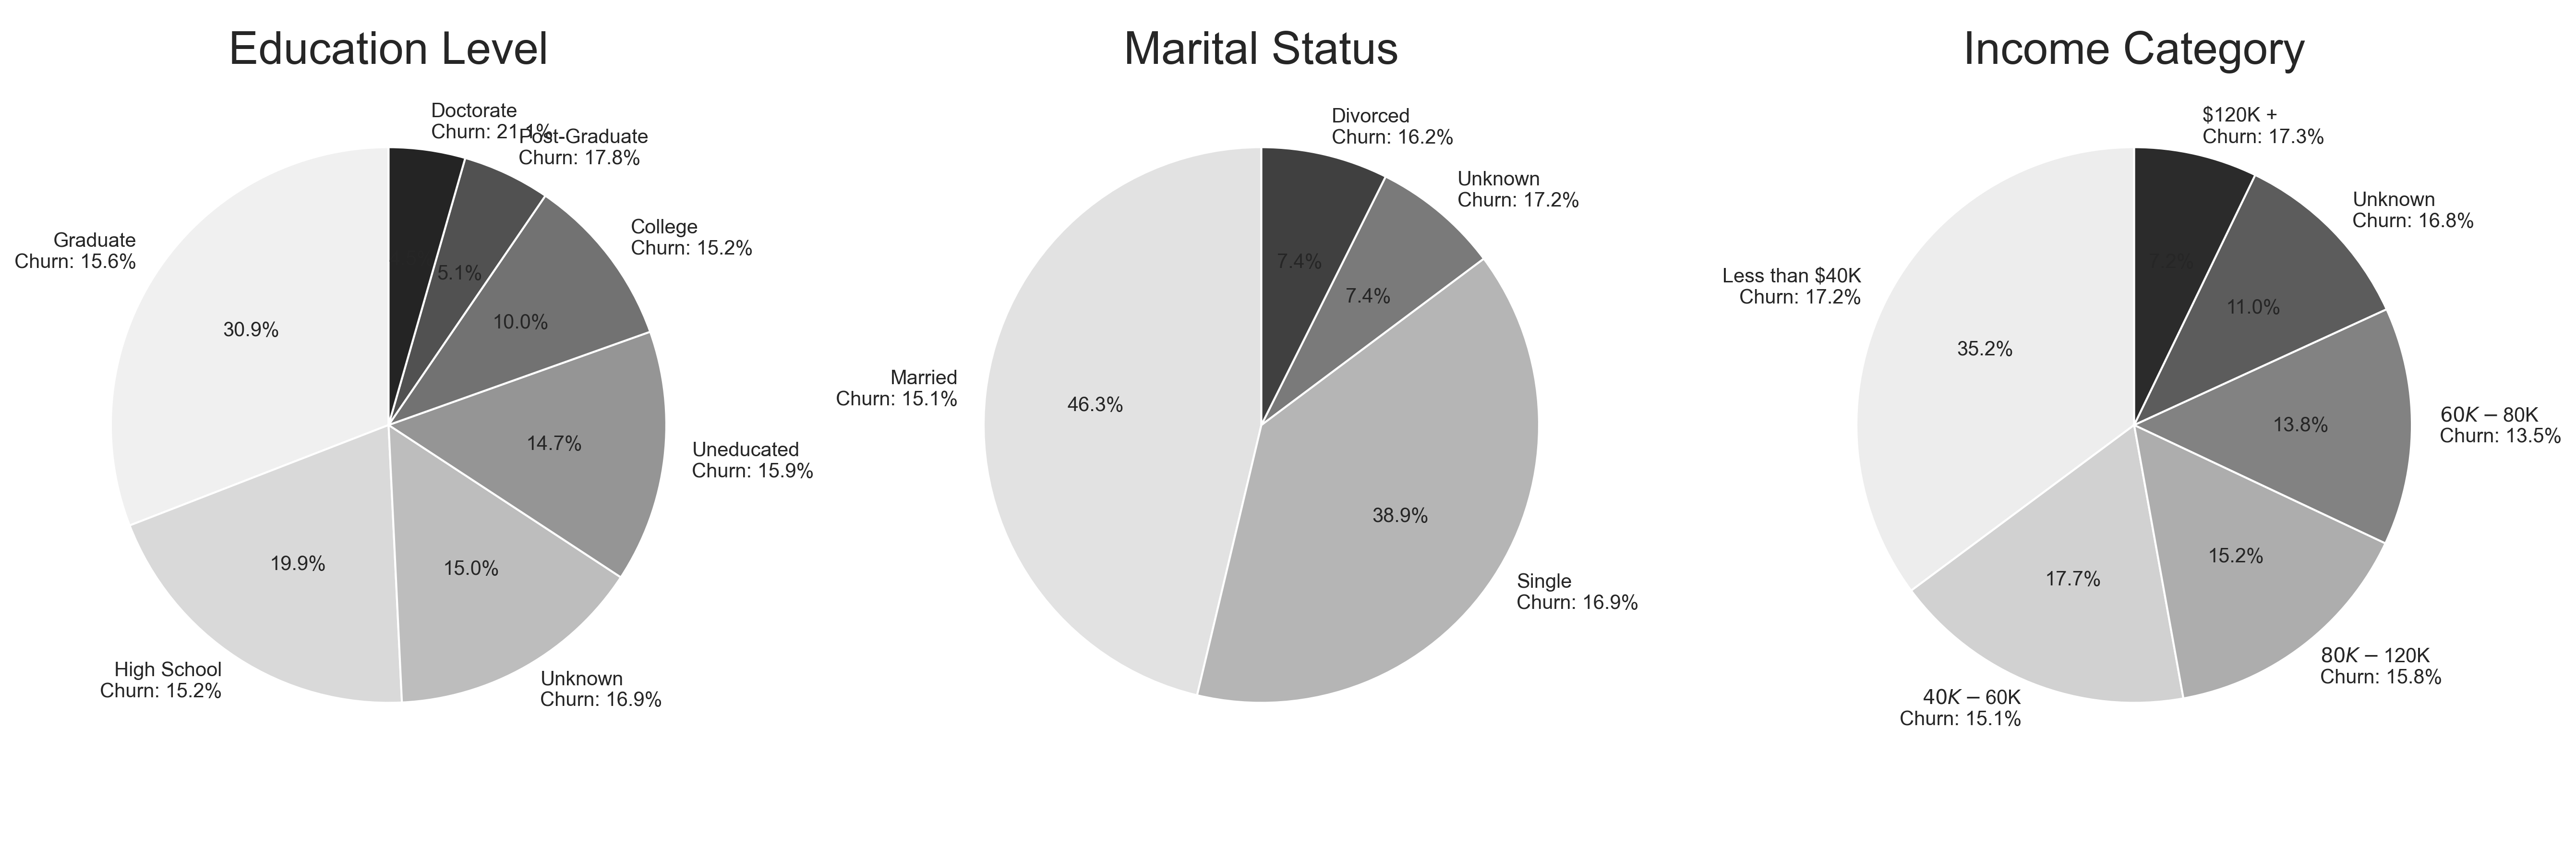

In [393]:
colunas_contagem = ["Education_Level", "Marital_Status", "Income_Category"]

fig, axs = plt.subplots(1, 3, figsize=(18, 6), dpi=300)
axs = axs.flatten()

# Iterando pelas colunas para gerar os Pie-Plots
for idx, col in enumerate(colunas_contagem):
    counts = df[col].value_counts()
    churn_counts = df.groupby(col)['Attrition_Flag'].value_counts().unstack(fill_value=0)
    
    # Calculando a porcentagem de churn para cada categoria
    churn_percentages = (churn_counts['Attrited Customer'] / counts) * 100
    
    # Preparando os rótulos
    labels = [f'{label}\nChurn: {churn_percentages[label]:.1f}%' for label in counts.index]
    axs[idx].pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, 
                 colors=sns.color_palette("Greys", n_colors=len(counts)), 
                 textprops={'fontsize': 10})
    axs[idx].set_title(f'{col.replace("_", " ").title()}', y = 0.925, fontsize = 22.5)
    axs[idx].axis('equal')
    
plt.tight_layout()
plt.show()

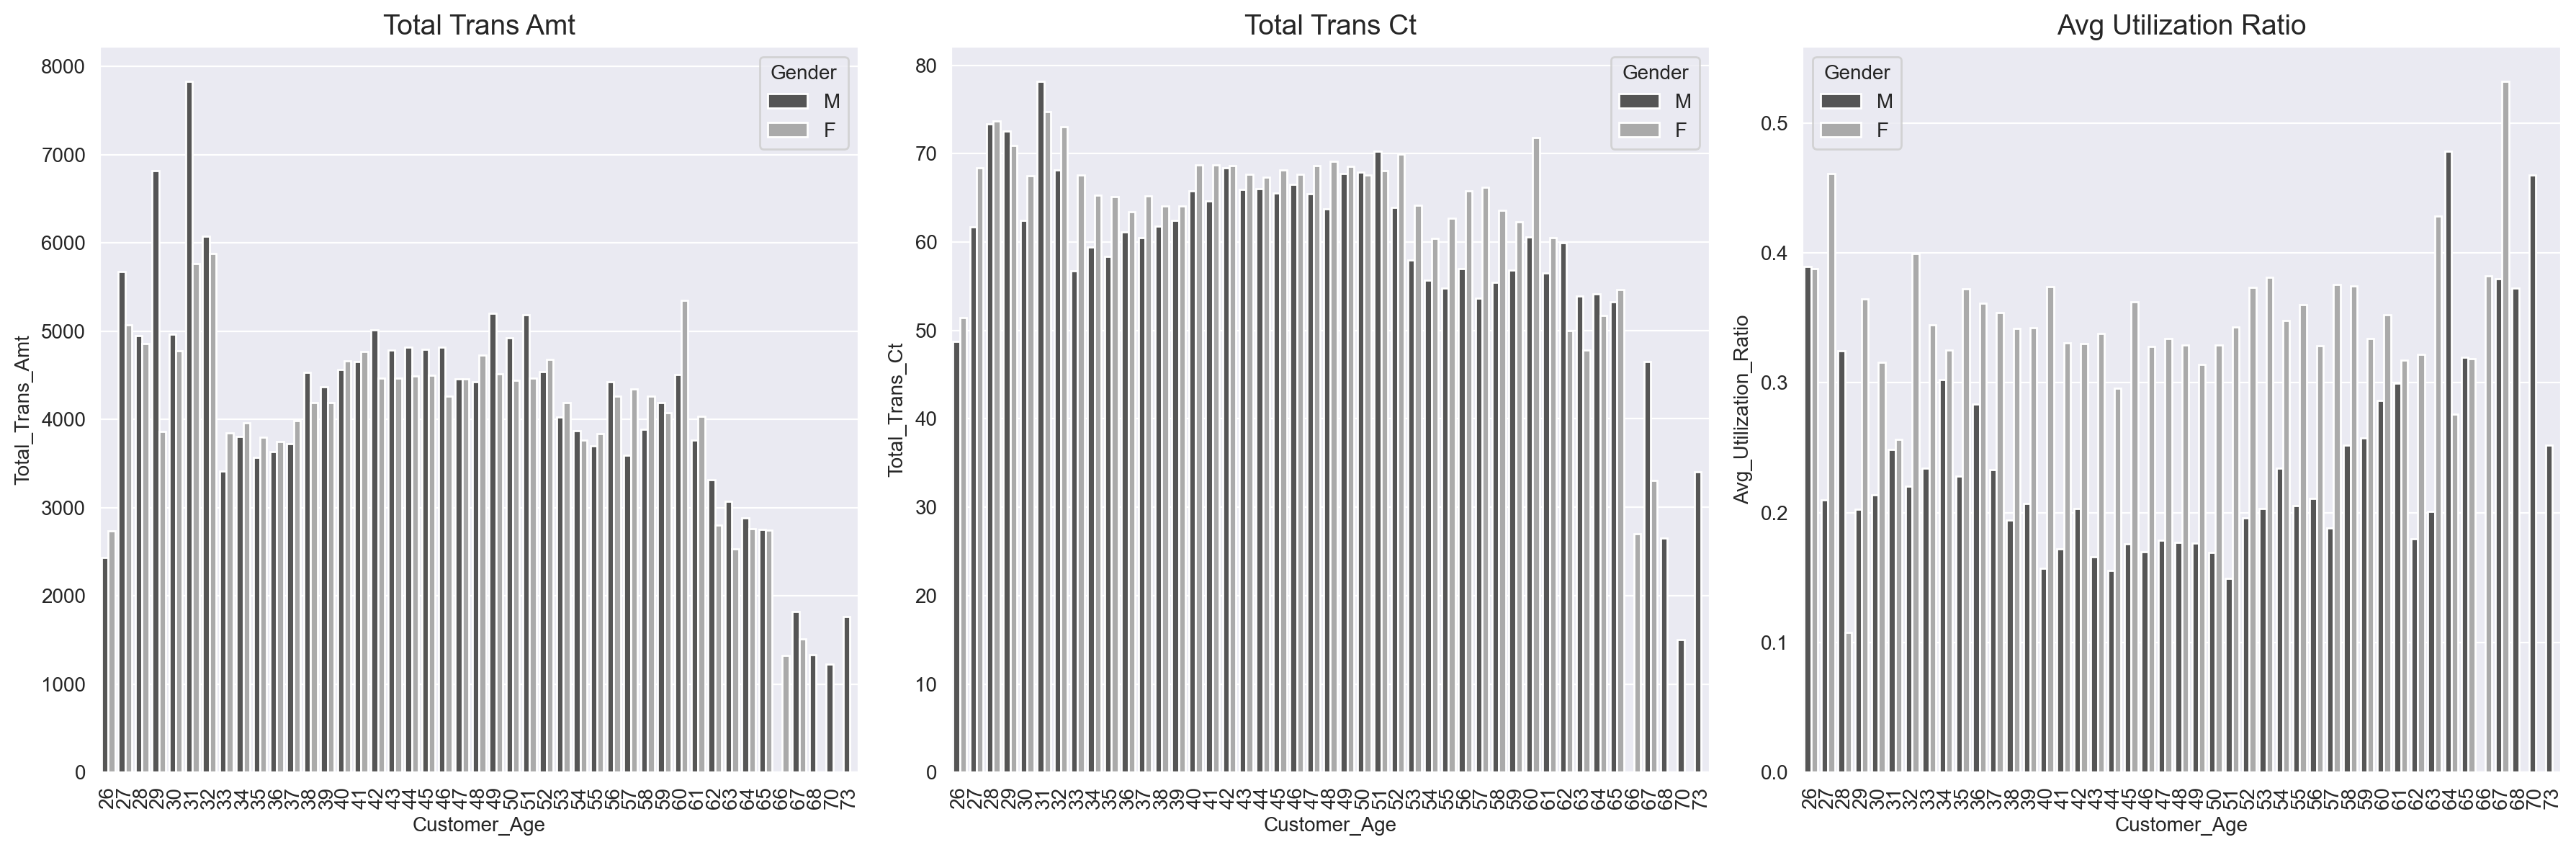

In [386]:
# Estabelecendo colunas de interesse
colunas_transferencia = ['Total_Trans_Amt','Total_Trans_Ct','Avg_Utilization_Ratio']

# Definir uma paleta personalizada para os gêneros
paletta_customizada = {"M": "#555555", "F": "#aaaaaa"} 

fig, axs = plt.subplots(1, 3, figsize=(18, 6), dpi=200)
for idx, col in enumerate(colunas_transferencia):
    sns.barplot(df, x="Customer_Age", y=col, hue="Gender", palette=paletta_customizada, ax=axs[idx], ci=None)
    axs[idx].set_title(f'{col.replace("_", " ")}', fontsize=14)
    axs[idx].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

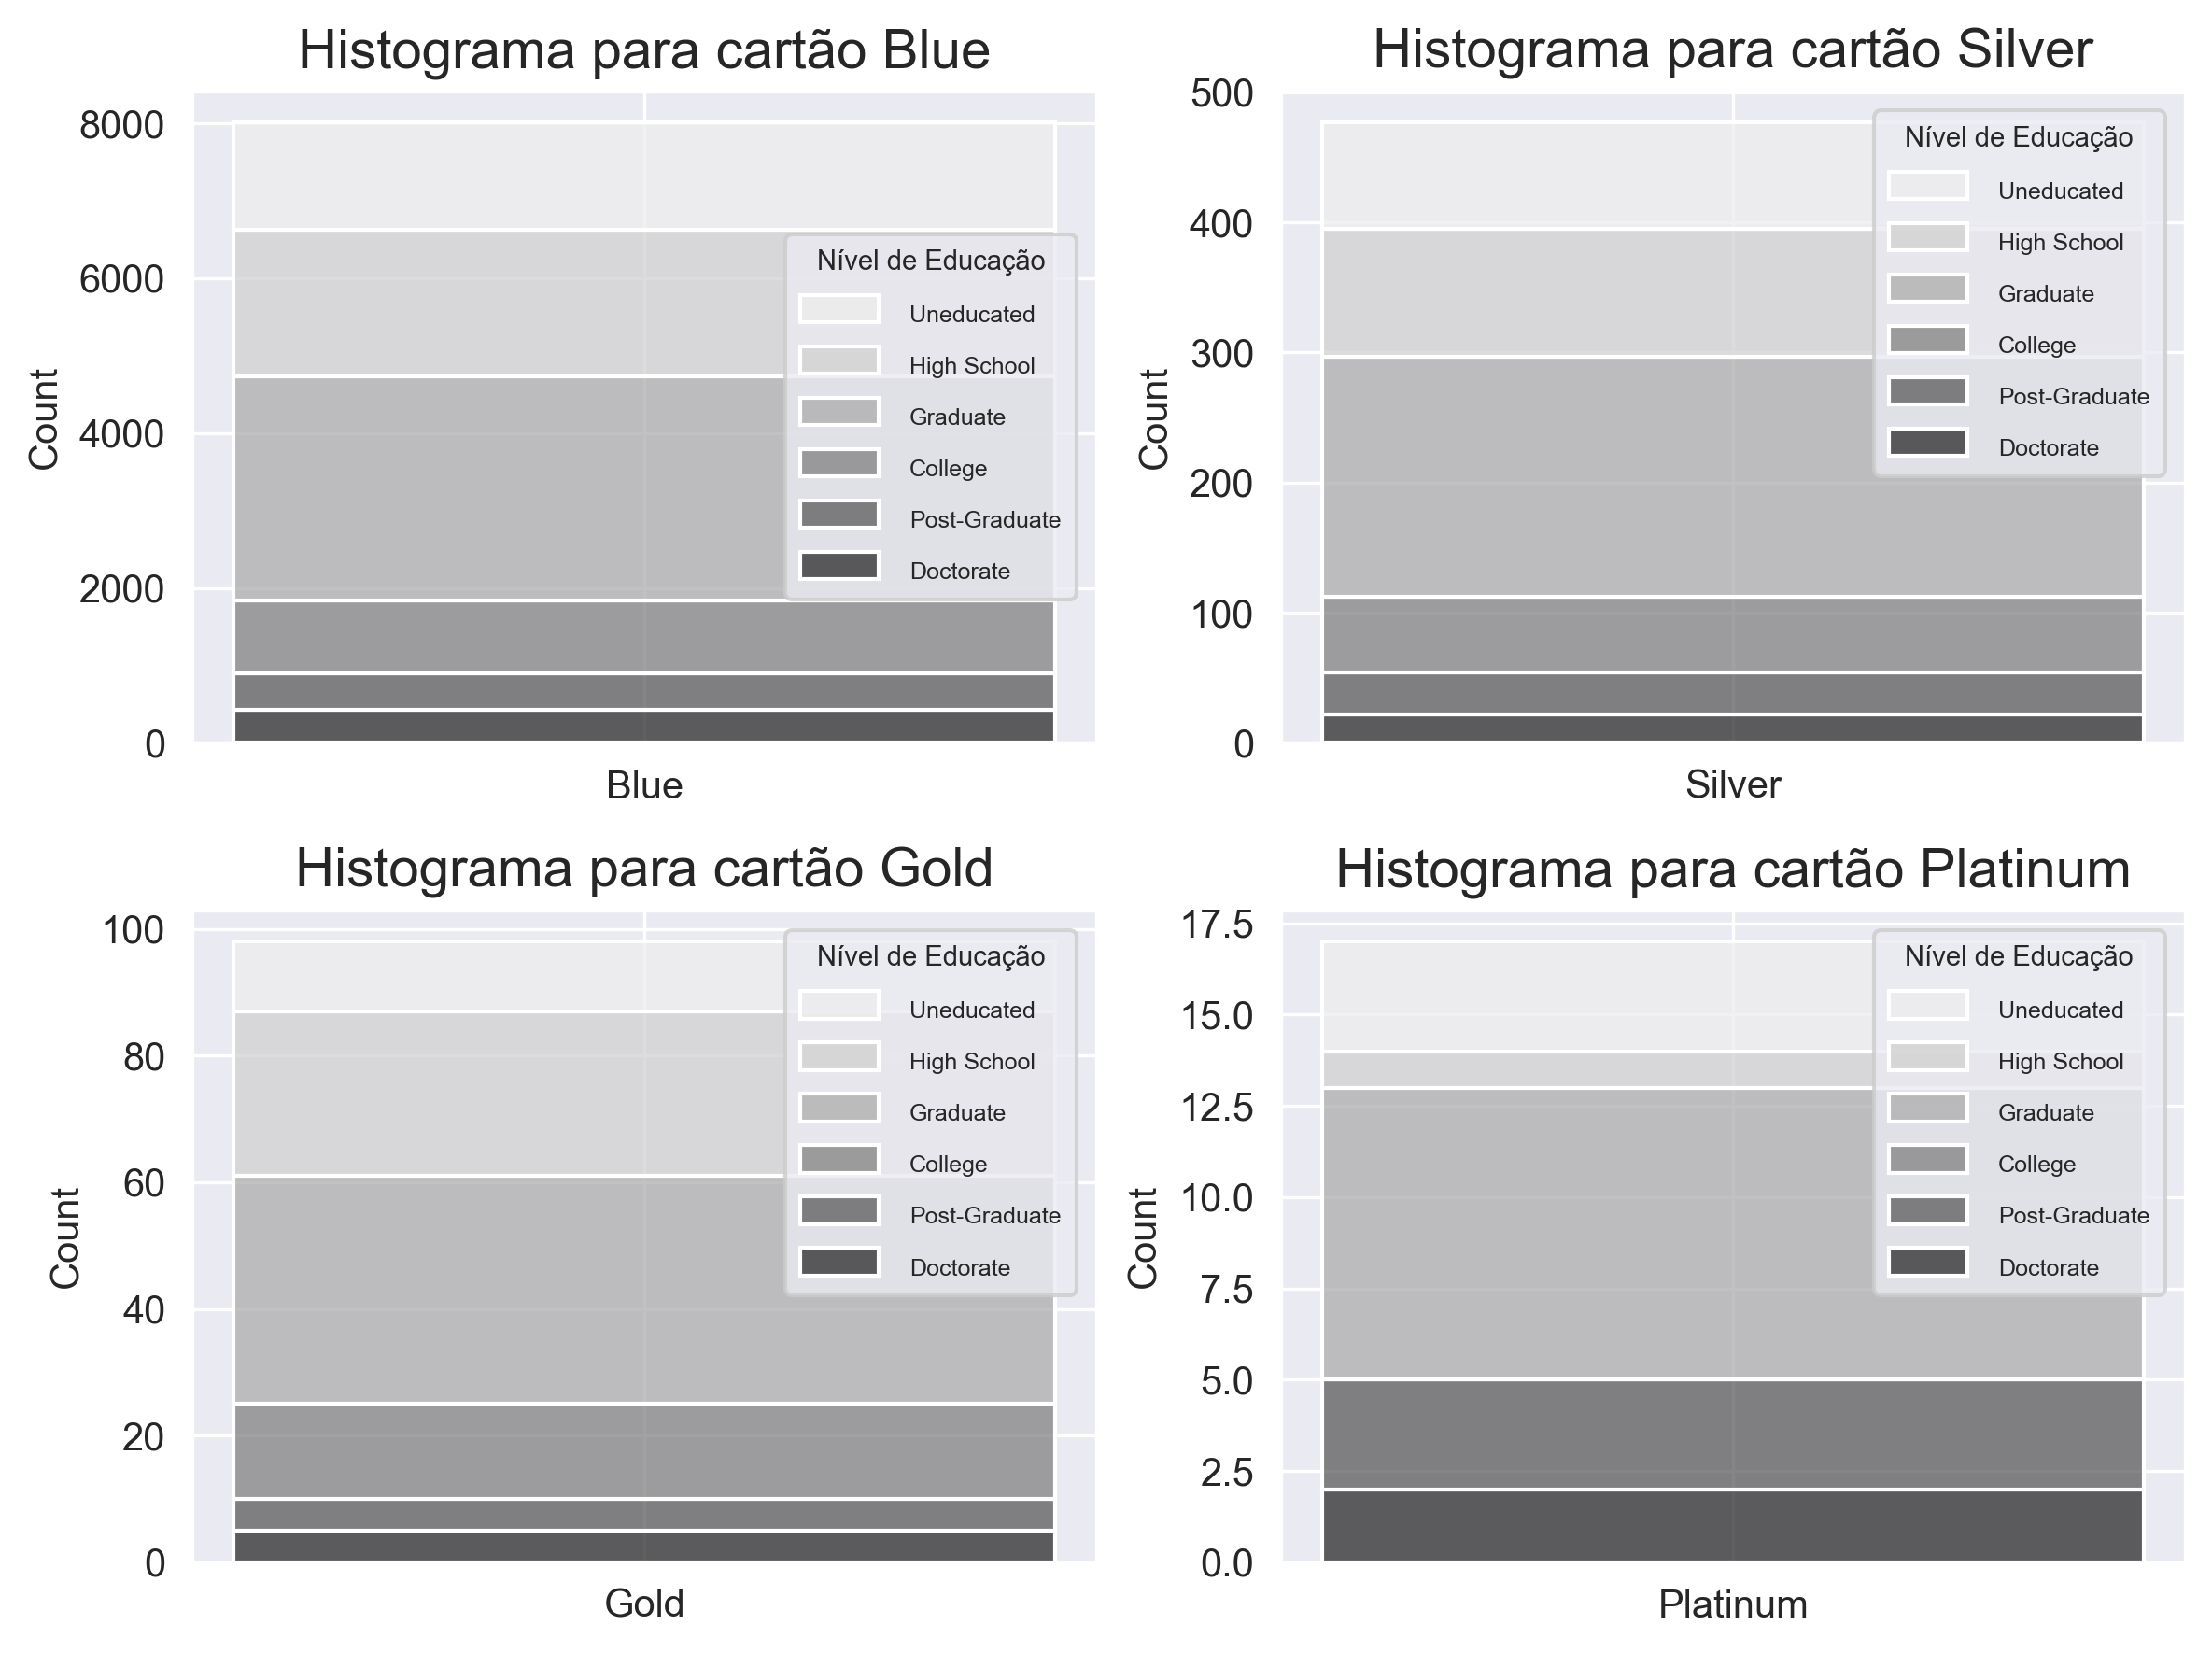

In [397]:
# Lista com os tipos de cartão à serem analisados
card_tipos = ["Blue", "Silver", "Gold", "Platinum"]

fig, axs = plt.subplots(2, 2, figsize=(8, 6), dpi=300)
axs = axs.flatten()

paletta_customizada = {
    "High School": "#999999", 
    "Graduate": "#666666",     
    "Uneducated": "#333333",   
    "College": "#000000",       
    "Post-Graduate": "#cccccc",  
    "Doctorate": "#444444"     
}

# Definindo a ordem nas legendas para o HUE
education_order = ["Uneducated","High School","Graduate","College","Post-Graduate","Doctorate"]

for idx, elem in enumerate(card_tipos):
    # Filtrando para excluir casos em que o Education_Level é "Unknown" e garantindo a análise de um único elemento por vez
    df_filter = df[(df["Card_Category"] == elem) & (df["Education_Level"] != "Unknown")]
    
    sns.histplot(df_filter, x='Card_Category', hue="Education_Level", 
                 palette="Greys", ax=axs[idx], multiple="stack", 
                 hue_order = education_order)  
    
    legend = axs[idx].get_legend() 
    if legend:  
        legend.set_title('Nível de Educação')  
        plt.setp(legend.get_texts(), fontsize='6')  
        plt.setp(legend.get_title(), fontsize='7')  

    axs[idx].set_title(f'Histograma para cartão {elem}', fontsize=14)
    axs[idx].set_xlabel('')

plt.tight_layout()
plt.show()

# Data Cleaning

Esse processo é essencial para garantir a qualidade e consistência dos dados antes de aplicá-los em análises ou nos modelos de machine learning.

In [ ]:
# ainda falta tempoooo